In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df=pd.read_csv(r"C:\Users\pmjv0\Downloads\News.csv")

In [44]:
df.head()

,Ind,title,text,subject,date,class
0,0.0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0.0
1,1.0,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0.0
2,2.0,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0.0
3,3.0,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0.0
4,4.0,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0.0


Data preprocessing

In [45]:
df.shape

(44940, 6)

In [46]:
#deleting title,subject and date
data = df.drop(["Ind","title", "subject","date"], axis = 1)

In [47]:
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0.0
1,House Intelligence Committee Chairman Devin Nu...,0.0
2,"On Friday, it was revealed that former Milwauk...",0.0
3,"On Christmas day, Donald Trump announced that ...",0.0
4,Pope Francis used his annual Christmas Day mes...,0.0


In [48]:
data.isnull().sum()

text     21
class    42
dtype: int64

In [49]:
#dropping null valued columns
data.dropna(inplace=True)

In [50]:
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0.0
1,House Intelligence Committee Chairman Devin Nu...,0.0
2,"On Friday, it was revealed that former Milwauk...",0.0
3,"On Christmas day, Donald Trump announced that ...",0.0
4,Pope Francis used his annual Christmas Day mes...,0.0


In [51]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [52]:
#Shuffling data to prevent biased results
data = data.sample(frac=1)
data.reset_index(inplace=True)

In [53]:
data.head()

,index,text,class
0,40705,WELLINGTON (Reuters) - New Zealand s small nat...,1.0
1,16434,If the Obama regime is allowed to wrest contro...,0.0
2,23004,21st Century Wire says WikiLeaks has released ...,0.0
3,17271,Karl Rove is suggesting Hillary suffered brain...,0.0
4,21588,Never mind the fact that Kid Rock fought for a...,0.0


In [54]:
#removing index
data.drop(["index"], axis=1, inplace=True)

In [55]:
data.head()

,text,class
0,WELLINGTON (Reuters) - New Zealand s small nat...,1.0
1,If the Obama regime is allowed to wrest contro...,0.0
2,21st Century Wire says WikiLeaks has released ...,0.0
3,Karl Rove is suggesting Hillary suffered brain...,0.0
4,Never mind the fact that Kid Rock fought for a...,0.0


<AxesSubplot:xlabel='class', ylabel='count'>

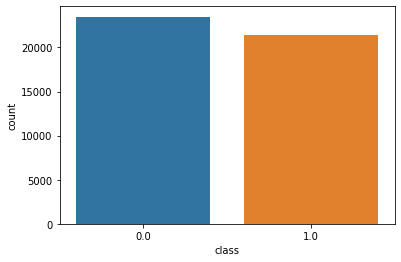

In [56]:
#each category visualization
import seaborn as sns
sns.countplot(data=data,x='class',order=data['class'].value_counts().index)

In [57]:
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops=nltk.corpus.stopwords.words('english')
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pmjv0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [61]:
from nltk.tokenize import TreebankWordTokenizer
tokenize=TreebankWordTokenizer()
def token(txt):
    wordds=' '.join(tokenize.tokenize(txt))
    return wordds
data['text']=data['text'].apply(lambda x:token(x.lower()))


In [62]:
data.head()

,text,class
0,wellington ( reuters ) - new zealand s small n...,1.0
1,if the obama regime is allowed to wrest contro...,0.0
2,21st century wire says wikileaks has released ...,0.0
3,karl rove is suggesting hillary suffered brain...,0.0
4,never mind the fact that kid rock fought for a...,0.0


In [64]:
def rem_stops(txt):
    words=' '.join([i for i in txt.split() if i not in stops])
    return words
data['text']=data['text'].apply(lambda x:rem_stops(x))

In [65]:
data.head()

,text,class
0,wellington ( reuters ) - new zealand small nat...,1.0
1,obama regime allowed wrest control elections s...,0.0
2,21st century wire says wikileaks released larg...,0.0
3,karl rove suggesting hillary suffered brain da...,0.0
4,never mind fact kid rock fought full custody b...,0.0


In [66]:
def rem_punc(txt):
    words="".join([i for i in txt if i not in string.punctuation])
    return words
data['text']=data['text'].apply(lambda x:rem_punc(x))

In [67]:
data.head()

,text,class
0,wellington reuters new zealand small nation...,1.0
1,obama regime allowed wrest control elections s...,0.0
2,21st century wire says wikileaks released larg...,0.0
3,karl rove suggesting hillary suffered brain da...,0.0
4,never mind fact kid rock fought full custody b...,0.0


(-0.5, 799.5, 799.5, -0.5)

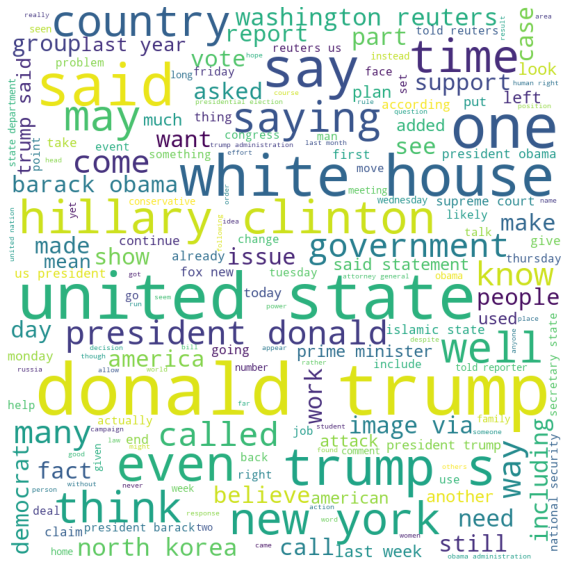

In [68]:
from wordcloud import WordCloud,STOPWORDS
txt=" ".join(list(data['text']))
wordcloud=WordCloud(height=800,width=800,background_color="white",stopwords=STOPWORDS,min_font_size=10) .generate(txt)
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.tight_layout(pad=0)
plt.axis("off")

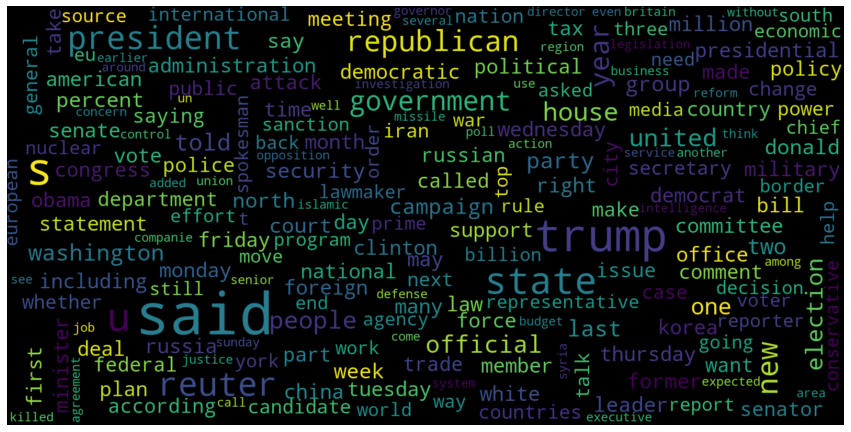

In [69]:
# Real
consolidated = ' '.join(word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,height=800,random_state=21,max_font_size=110,collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


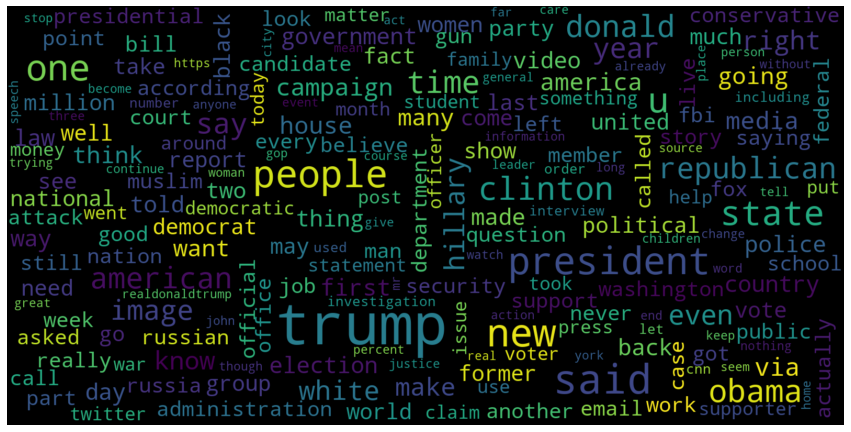

In [70]:
#fake
consolidated = ' '.join(word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,height=800,random_state=21,max_font_size=110,collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
  
x_train, x_test, y_train, y_test = train_test_split(data['text'],data['class'], test_size=0.4)

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
x_train=vector.fit_transform(x_train)
x_test=vector.transform(x_test)

In [76]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)
print(accuracy_score(y_train, model1.predict(x_train)))
print(accuracy_score(y_test, model1.predict(x_test)))

0.9928353998069641
0.9853006681514477


In [78]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
print(accuracy_score(y_train, model1.predict(x_train)))
print(accuracy_score(y_test, model1.predict(x_test)))

0.9928353998069641
0.9853006681514477
